In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

In [2]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
df = pd.read_csv('/home/exam/Downloads/Iris.csv')

In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
X = df.drop(['Species'],axis=1)

In [6]:
X_scaled = StandardScaler().fit_transform(X)
X_scaled[:5]

array([[-1.72054204, -0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.69744751, -1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.67435299, -1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.65125846, -1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.62816394, -1.02184904,  1.26346019, -1.3412724 , -1.31297673]])

In [7]:
y = df['Species']

In [8]:
features = X_scaled.T
cov_matrix = np.cov(features)
cov_matrix[:5]

array([[ 1.00671141,  0.72148618, -0.40039813,  0.8886718 ,  0.90579723],
       [ 0.72148618,  1.00671141, -0.11010327,  0.87760486,  0.82344326],
       [-0.40039813, -0.11010327,  1.00671141, -0.42333835, -0.358937  ],
       [ 0.8886718 ,  0.87760486, -0.42333835,  1.00671141,  0.96921855],
       [ 0.90579723,  0.82344326, -0.358937  ,  0.96921855,  1.00671141]])

In [9]:
values, vectors = np.linalg.eig(cov_matrix)
values[:5]

array([3.7603354 , 0.92794917, 0.23570257, 0.08883057, 0.02073933])

In [10]:
vectors[:5]

array([[-0.48136016, -0.02275157, -0.67406853,  0.55978662, -0.0067323 ],
       [-0.44844975,  0.38285827,  0.64520569,  0.40999945,  0.26061932],
       [ 0.23195044,  0.92007839, -0.27427786, -0.09491665, -0.12416613],
       [-0.51079205,  0.03074857,  0.13238322, -0.28817343, -0.79848404],
       [-0.5024696 ,  0.07356757, -0.19127876, -0.65305918,  0.52824072]])

In [11]:
explained_variances = []
for i in range(len(values)):
    explained_variances.append((values[i]/np.sum(values))*100)

In [12]:
print("variances of each failure",explained_variances)

variances of each failure [74.70533000277261, 18.43525688793197, 4.682624420508823, 1.7647673742564922, 0.4120213145300894]


Text(0.5, 0, 'dimensions')

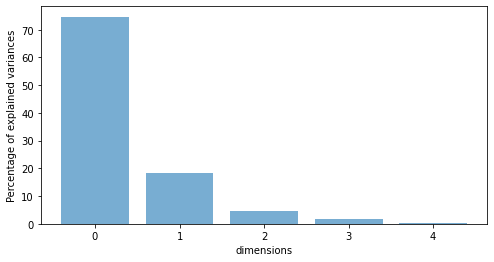

In [13]:
plt.figure(figsize=(8,4))
plt.bar(range(5),explained_variances,alpha=0.6)
plt.ylabel('Percentage of explained variances')
plt.xlabel('dimensions')

In [14]:
projected_1 = X_scaled.dot(vectors.T[0])
projected_2 = X_scaled.dot(vectors.T[1])
res = pd.DataFrame(projected_1,columns=['PC1'])
res['PC2'] = projected_2
res['Y'] = y
res.head()



,PC1,PC2,Y
0,2.816339,0.506051,Iris-setosa
1,2.645527,-0.651799,Iris-setosa
2,2.879481,-0.321036,Iris-setosa
3,2.810934,-0.577363,Iris-setosa
4,2.879884,0.670468,Iris-setosa


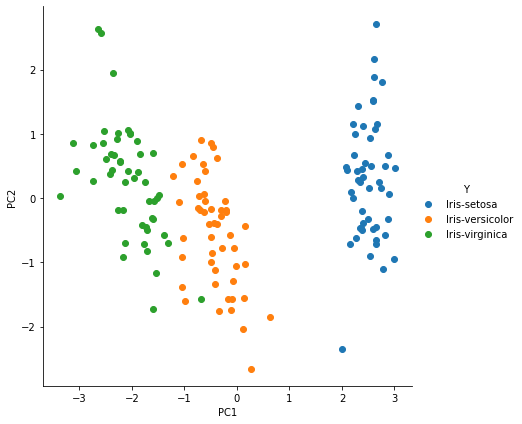

In [15]:
sns.FacetGrid(res,hue="Y",height=6).map(plt.scatter,'PC1','PC2').add_legend()
plt.show()